
# Model dynamic compared to eigenvalues   



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')


In [3]:
# Prepare the notebook for use of modelflow 

# Jupyter magic command to improve the display of charts in the Notebook
%matplotlib inline

# Import pandas 
import pandas as pd

# Import the model class from the modelclass module 
from modelclass import model 

# functions that improve rendering of modelflow outputs
model.widescreen()
model.scroll_off();

<IPython.core.display.Javascript object>

In [4]:
mpak,bline = model.modelload('..\models\pak.pcim', \
                                alfa=0.8,run=True,keep= 'Baseline',start=2023, end=2100
                             ,silent=1,relconv=0.0000000000001,max_iterations=5000)
mpak.basedf = bline

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


In [5]:
oilshock_list = [0.01, 1. ,5. ,10. ] 

In [19]:
for oilshock in oilshock_list: 
    oilshockdf = mpak.basedf.upd(f'<2025> WLDFCRUDE_PETRO + {oilshock}')
    _ = mpak(oilshockdf,2023,2100,keep=f'${oilshock} increase in oil prices 2025',alfa=0.7) 

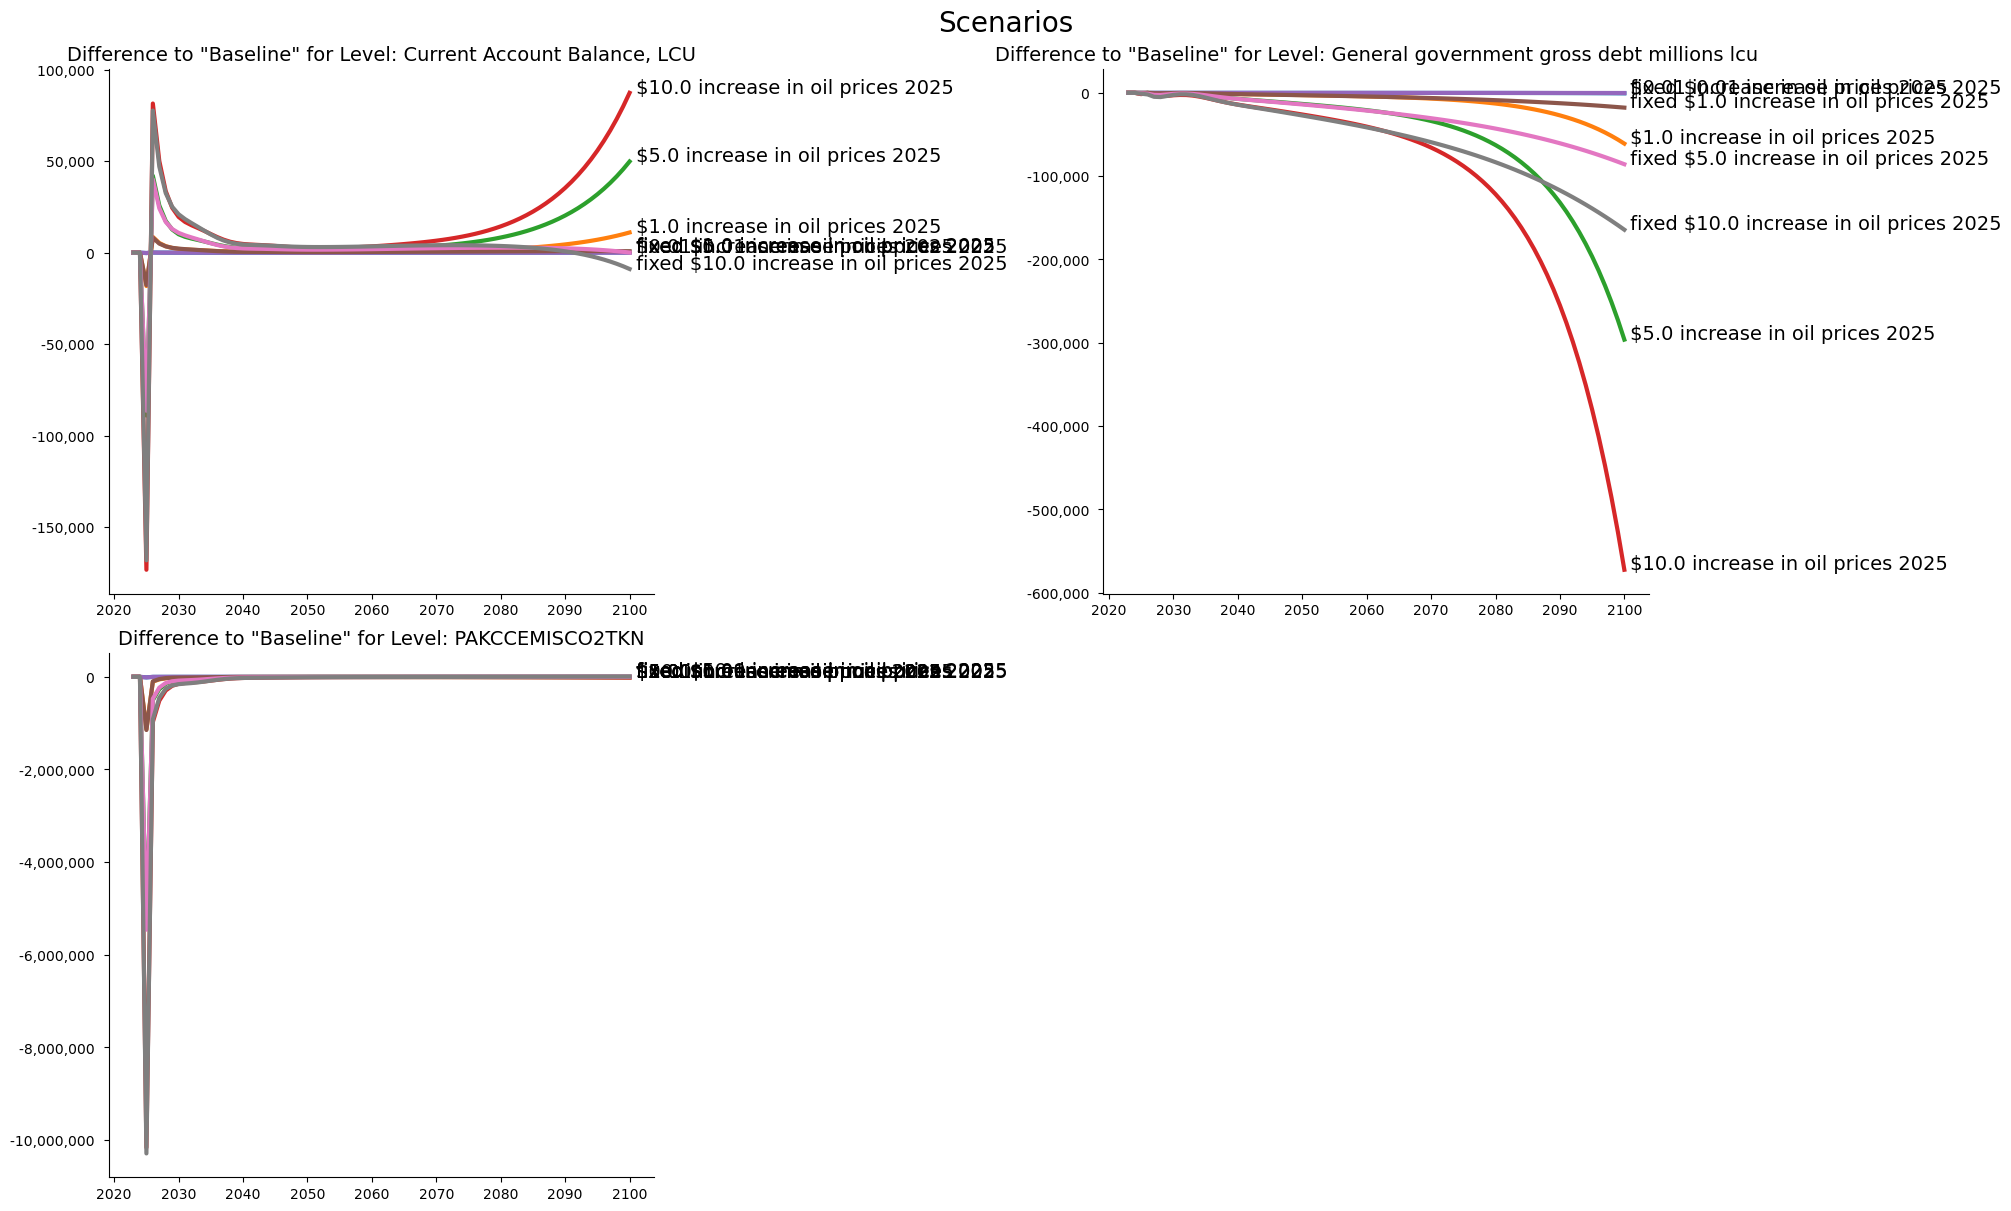

{'onefig': <Figure size 2000x1200 with 4 Axes>}

In [23]:
mpak.keep_plot('PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN',diff=True,start=2023,end=2100,samefig=1)

In [31]:
mpak.var_groups['Headline'] = '???GDPpckn ???NRTOTLCN ???LMEMPTOTL ???BFFINCABDCD  ???BFBOPTOTLCD ???GGBALEXGRCN ???BNCABLOCLCD_ ???FPCPITOTLXN ???BNCABFUNDCN'

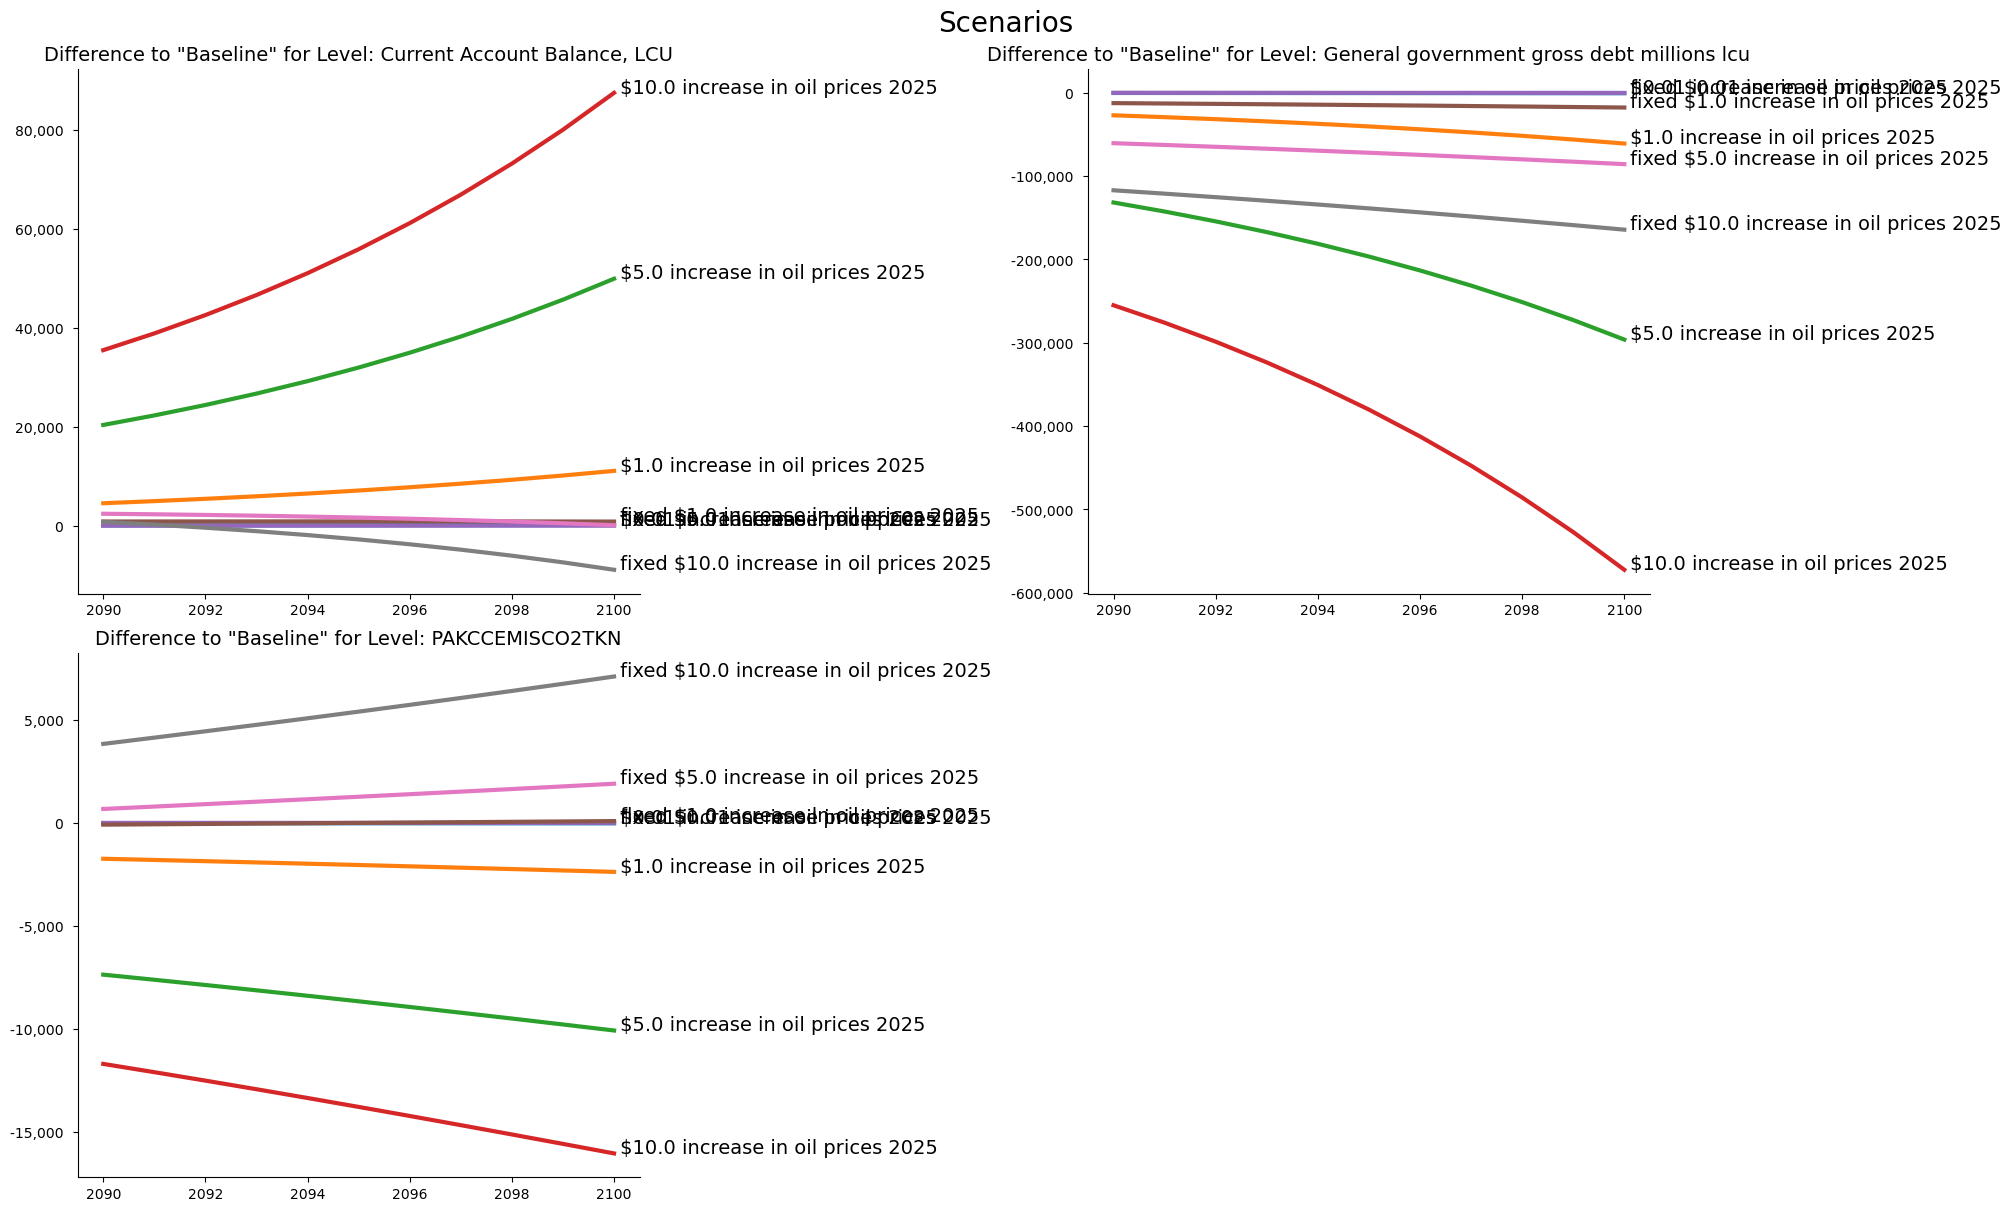

{'onefig': <Figure size 2000x1200 with 4 Axes>}

In [34]:
mpak.keep_plot('PAKBNCABFUNDCN PAKGGDBTTOTLCN PAKCCEMISCO2TKN PAKCCEMISCO2TKN',diff=True,start=2090,end=2100,samefig=1)

In [33]:
mpak.keep_show(use_smpl=True)

In [9]:
mpak.PAKNEGDIFPRVKN 

Endogeneous: PAKNEGDIFPRVKN: Prvt. Investment real
Formular: FRML <DAMP,STOC> PAKNEGDIFPRVKN = (PAKNEGDIFPRVKN_A*PAKNEGDIKSTKKN(-1)+ (0.00212272413966296+0.970234989019907*(PAKNEGDIFPRVKN(-1)/PAKNEGDIKSTKKN(-2))+(1-0.970234989019907)*(((LOG(PAKNYGDPPOTLKN))-(LOG(PAKNYGDPPOTLKN(-1))))+PAKDEPR)+0.0525240494260597*((LOG(PAKNEKRTTOTLCN/PAKNYGDPFCSTXN))-(LOG(PAKNEKRTTOTLCN(-1)/PAKNYGDPFCSTXN(-1))))) *PAKNEGDIKSTKKN(-1)) * (1-PAKNEGDIFPRVKN_D)+ PAKNEGDIFPRVKN_X*PAKNEGDIFPRVKN_D  $

PAKNEGDIFPRVKN  : Prvt. Investment real
PAKDEPR         : 
PAKNEGDIFPRVKN_A: Add factor:Prvt. Investment real
PAKNEGDIFPRVKN_D: Fix dummy:Prvt. Investment real
PAKNEGDIFPRVKN_X: Fix value:Prvt. Investment real
PAKNEGDIKSTKKN  : Capital stock, LCU
PAKNEKRTTOTLCN  : Rental Rate of Capital (Derived)
PAKNYGDPFCSTXN  : GDP Factor Cost Local Currency units Implicit Price deflator
PAKNYGDPPOTLKN  : Potential Output, constant LCU

Values :


Input last run:


In [10]:
fixdf =mpak.fix(bline,'PAKNEGDIFPRVKN')

The folowing variables are fixed
PAKNEGDIFPRVKN


In [11]:
for oilshock in oilshock_list: 
    oilshockdixdf = fixdf.upd(f'<2025> WLDFCRUDE_PETRO + {oilshock}')
    _ = mpak(oilshockdixdf,2023,2100,keep=f'fixed ${oilshock} increase in oil prices 2025',silent=1,alfa=0.7) 

In [12]:
impulse = {k: df.loc[2025,'WLDFCRUDE_PETRO']  - mpak.keep_solutions['Baseline'].loc[2025,'WLDFCRUDE_PETRO'] for 
            k,df  in mpak.keep_solutions.items()}
impact = {k: df.loc[2099,'PAKBNCABFUNDCN']  - mpak.keep_solutions['Baseline'].loc[2099,'PAKBNCABFUNDCN'] for 
            k,df  in mpak.keep_solutions.items()}
impact_pr_unit = {k : impact[k]/ impulse[k] 
                   for k in impulse.keys() } 

impact_pr_unit

{'Baseline': nan,
 '$0.01 increase in oil prices 2025': 10391.181612009454,
 '$1.0 increase in oil prices 2025': 10129.435919761658,
 '$5.0 increase in oil prices 2025': 9129.621519184113,
 '$10.0 increase in oil prices 2025': 7997.268819284439,
 'fixed $0.01 increase in oil prices 2025': 1038.9306545252252,
 'fixed $1.0 increase in oil prices 2025': 842.5360360145569,
 'fixed $5.0 increase in oil prices 2025': 96.20367631912231,
 'fixed $10.0 increase in oil prices 2025': -741.1705451011658}

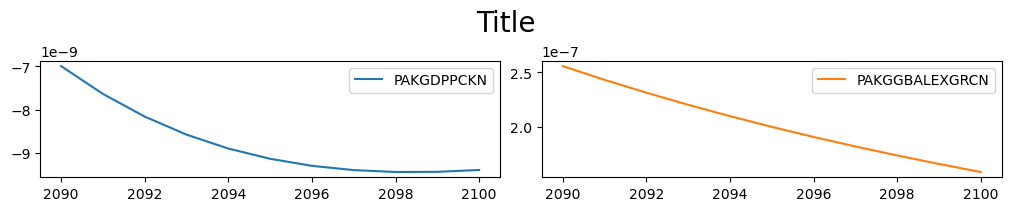

In [13]:
with mpak.set_smpl(2090,2100):
    mpak['#Headline'].difpct.plot()

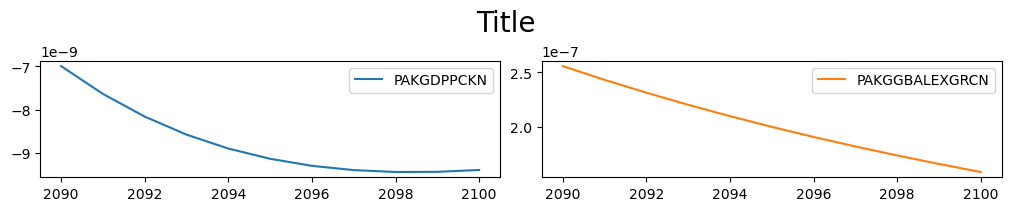

In [14]:
with mpak.set_smpl(2090,2100):
    mpak['#Headline'].difpct.plot()

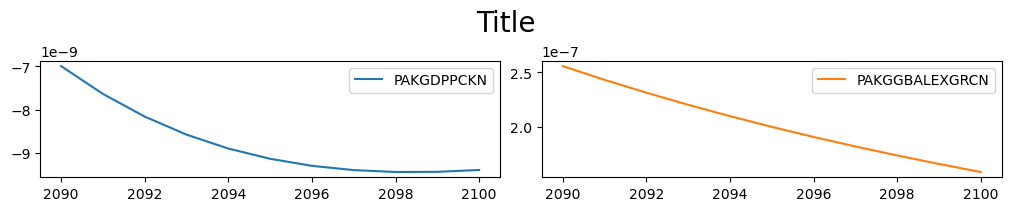

In [15]:
with mpak.set_smpl(2090,2100):
    mpak['#Headline'].difpct.plot()

In [16]:
mpak.keep_show(use_smpl=1)

In [17]:
mpak['#Headline'].dif.df

PAKGDPPCKN  PAKGGBALEXGRCN
2023  2.328306e-10   -2.980232e-08
2024  8.585630e-10   -7.962808e-08
2025 -5.865097e+02   -1.041948e+02
2026  3.727581e+01    8.560971e+01
2027  1.399237e+02    2.874038e+03
...            ...             ...
2096  2.939584e-01    2.871972e+03
2097  2.944584e-01    2.966948e+03
2098  2.948060e-01    3.063633e+03
2099  2.950247e-01    3.161816e+03
2100  2.951357e-01    3.261255e+03

[78 rows x 2 columns]

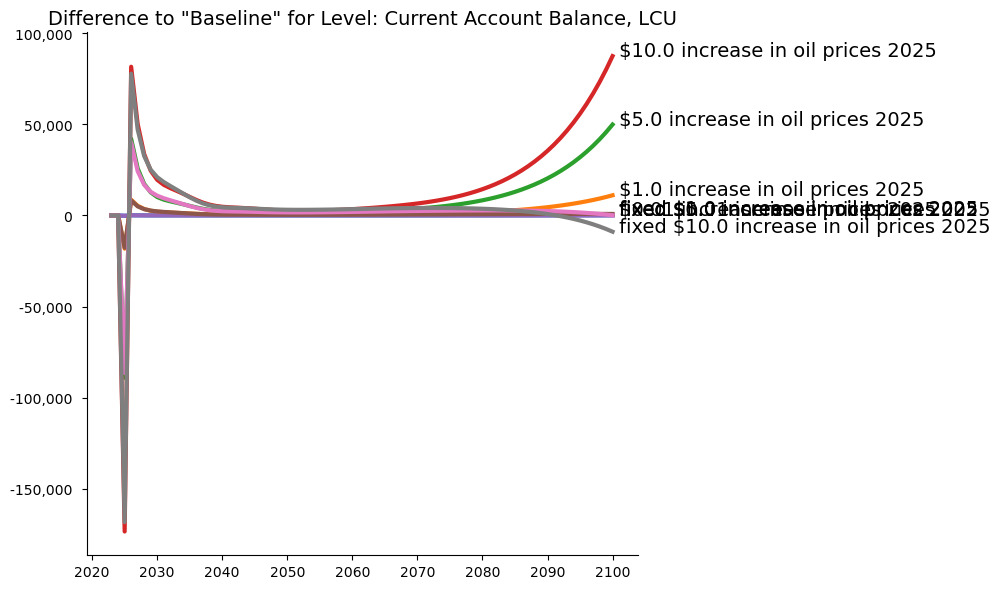

{'PAKBNCABFUNDCN': <Figure size 1000x600 with 1 Axes>}

In [18]:
mpak.keep_plot('PAKBNCABFUNDCN',diff=True,start=2023,end=2100)